# Covid-19 infection in India/Italy/Spain: Mathematical models and predictions

## Objective of the Notebook
Objective of this notebook is to study COVID-19 outbreak with the help of some basic visualizations techniques. Comparison of various coutries in the World. Perform predictions and Time Series forecasting in order to study the impact and spread of the COVID-19 in comming days.

### What is COVID-19?

COVID-19 is a respiratory illness caused by a new virus. Symptoms include fever, coughing, sore throat and shortness of breath. The virus can spread from person to person, but good hygiene can prevent infection.



---



### Status of Research and Development 


Currently the goal of all scientists around the world is to "Flatten the Curve". COVID-19 currently has exponential growth rate around the world which we will be seeing in the notebook ahead. Flattening the Curve typically implies even if the number of Confirmed Cases are increasing but the distribution of those cases should be over longer timestamp. To put it in simple words if say suppose COVID-19 is going infect 100K people then those many people should be infected in 1 year but not in a month.

### Importing required Python Packages and Libraries

In [0]:
!pip install statsmodels --upgrade
from keras.models import Sequential
import numpy as np
import pandas as pd
from keras.layers import Dense
from pandas import read_csv
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import DataFrame
from pandas import concat
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARIMA
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.11.1)


### Datasets

In [0]:
india_data=pd.read_csv("confirmed_india_copy.csv", header=0)
print(india_data.head())

global_data=pd.read_csv("time_series_covid19_confirmed_global.csv", header=0, index_col=0)
print(global_data.head())

  ObservationDate  India
0      01/22/2020      0
1      01/23/2020      0
2      01/24/2020      0
3      01/25/2020      0
4      01/26/2020      0
                Afghanistan  Albania  ...  Sao Tome and Principe  Yemen
Country/Region                        ...                              
1/22/20                   0        0  ...                      0      0
1/23/20                   0        0  ...                      0      0
1/24/20                   0        0  ...                      0      0
1/25/20                   0        0  ...                      0      0
1/26/20                   0        0  ...                      0      0

[5 rows x 264 columns]


### **International status**

In [0]:
covid=pd.read_csv("covid_19_data.csv")
covid.head()
covid.drop(["SNo"],1,inplace=True)
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()

In [0]:
print("Basic Information")
print("Totol number of countries with Disease Spread: ",len(covid["Country/Region"].unique()))
print("Total number of Confirmed Cases around the World: ",datewise["Confirmed"].iloc[-1])
print("Total number of Recovered Cases around the World: ",datewise["Recovered"].iloc[-1])
print("Total number of Deaths Cases around the World: ",datewise["Deaths"].iloc[-1])
print("Total number of Active Cases around the World: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed Cases around the World: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])
print("Approximate number of Confirmed Cases per Day around the World: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Recovered Cases per Day around the World: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Death Cases per Day around the World: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
print("Approximate number of Confirmed Cases per hour around the World: ",np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Recovered Cases per hour around the World: ",np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Approximate number of Death Cases per hour around the World: ",np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))
print("Number of Confirmed Cases in last 24 hours: ",datewise["Confirmed"].iloc[-1]-datewise["Confirmed"].iloc[-2])
print("Number of Confirmed Cases in last 24 hours: ",datewise["Recovered"].iloc[-1]-datewise["Recovered"].iloc[-2])
print("Number of Confirmed Cases in last 24 hours: ",datewise["Deaths"].iloc[-1]-datewise["Deaths"].iloc[-2])

Basic Information
Totol number of countries with Disease Spread:  220
Total number of Confirmed Cases around the World:  2708885
Total number of Recovered Cases around the World:  738486
Total number of Deaths Cases around the World:  190858
Total number of Active Cases around the World:  1779541
Total number of Closed Cases around the World:  929344
Approximate number of Confirmed Cases per Day around the World:  29128.0
Approximate number of Recovered Cases per Day around the World:  7941.0
Approximate number of Death Cases per Day around the World:  2052.0
Approximate number of Confirmed Cases per hour around the World:  1214.0
Approximate number of Recovered Cases per hour around the World:  331.0
Approximate number of Death Cases per hour around the World:  86.0
Number of Confirmed Cases in last 24 hours:  85470
Number of Confirmed Cases in last 24 hours:  28792
Number of Confirmed Cases in last 24 hours:  7831


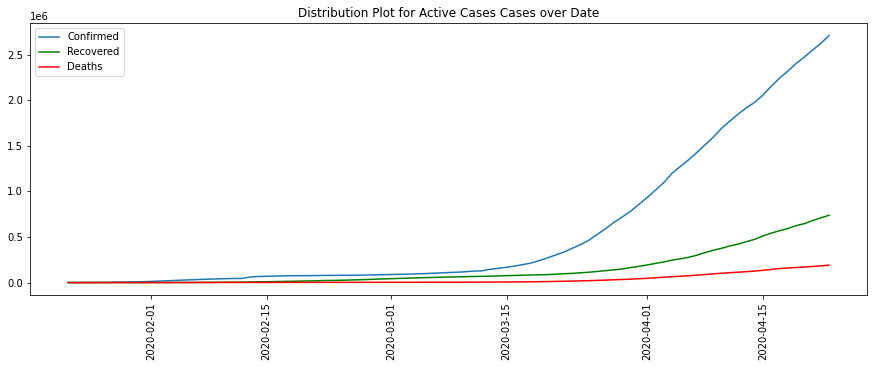

In [0]:
plt.figure(figsize=(15,5))
plt.plot(datewise.index.date, datewise["Confirmed"],label="Confirmed")
plt.plot(datewise.index.date, datewise["Recovered"], color="green", label="Recovered")
plt.plot(datewise.index.date, datewise["Deaths"], color="red", label="Deaths")
plt.title("Distribution Plot for Active Cases Cases over Date")
plt.xticks(rotation=90)
plt.legend()


**Growth Factor**

Growth factor is the factor by which a quantity multiplies itself over time.


Growth factor = Every day's new (Confirmed,Recovered,Deaths) / new (Confirmed,Recovered,Deaths) on the previous day.

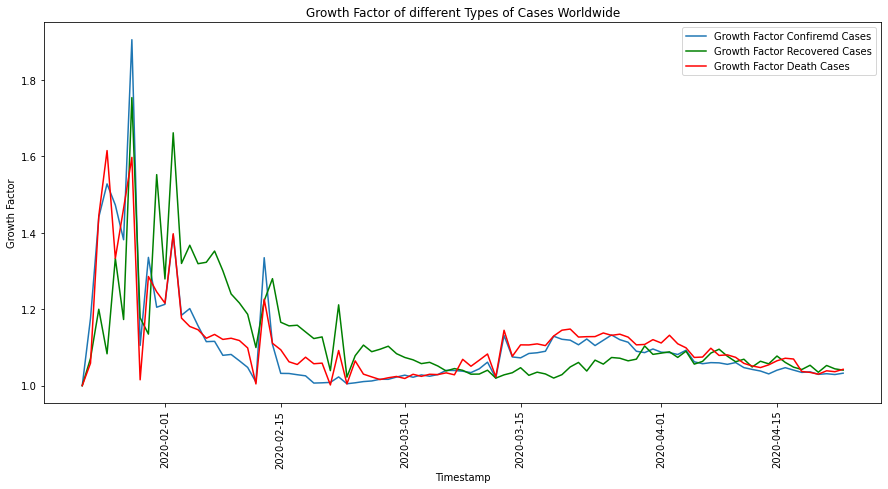

In [0]:
daily_increase_confirm=[]
daily_increase_recovered=[]
daily_increase_deaths=[]
for i in range(datewise.shape[0]-1):
    daily_increase_confirm.append(((datewise["Confirmed"].iloc[i+1]/datewise["Confirmed"].iloc[i])))
    daily_increase_recovered.append(((datewise["Recovered"].iloc[i+1]/datewise["Recovered"].iloc[i])))
    daily_increase_deaths.append(((datewise["Deaths"].iloc[i+1]/datewise["Deaths"].iloc[i])))
daily_increase_confirm.insert(0,1)
daily_increase_recovered.insert(0,1)
daily_increase_deaths.insert(0,1)

plt.figure(figsize=(15,7))
plt.plot(datewise.index,daily_increase_confirm,label="Growth Factor Confiremd Cases")
plt.plot(datewise.index,daily_increase_recovered,label="Growth Factor Recovered Cases",color="green")
plt.plot(datewise.index,daily_increase_deaths,label="Growth Factor Death Cases",color="red")
plt.xlabel("Timestamp")
plt.ylabel("Growth Factor")
plt.title("Growth Factor of different Types of Cases Worldwide")
plt.xticks(rotation=90)
plt.legend()

Growth Factor constantly above 1 is an clear indication of Exponential increase in all form of cases

**Recent advances in the world**

The first human trial in Europe of a coronavirus vaccine has begun in Oxford.  Two volunteers, who are both scientists, have been injected with the experimental vaccine. 

They are the first of more than 800 adults aged between 18 and 55 who have been recruited for the study.  Half the group will receive the Covid-19 vaccine, and half will get a control vaccine which protects against meningitis. The results won't be known for several months.

Meanwhile the UK government has said that millions of key workers and their families will be eligible for a coronavirus test if they develop symptoms. 

The Health Secretary Matt Hancock announced that they would be able to book a test online. More testing centres are being opened and the army will be helping establish mobile testing facilities.  



---



### **National status(India)**

In [0]:
india_data=covid[covid["Country/Region"]=="India"]
datewise_india=india_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_india.iloc[-1])
print("Total Active Cases: ",datewise_india["Confirmed"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases: ",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Confirmed    23077
Recovered     5012
Deaths         721
Name: 2020-04-23 00:00:00, dtype: int64
Total Active Cases:  17344
Total Closed Cases:  5733


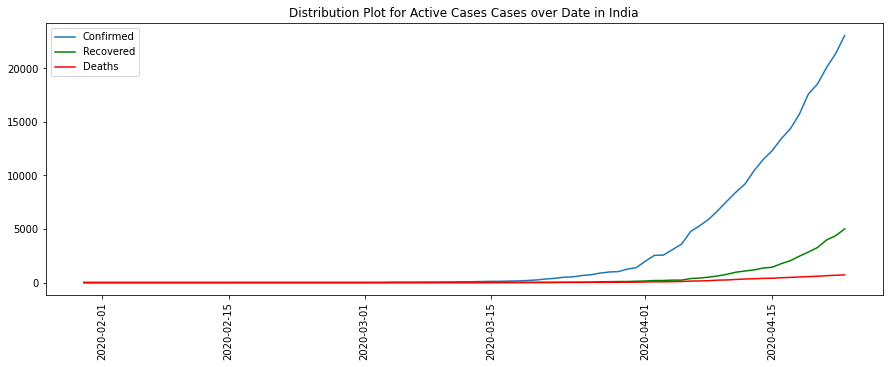

In [0]:
plt.figure(figsize=(15,5))
plt.plot(datewise_india.index.date, datewise_india["Confirmed"],label="Confirmed")
plt.plot(datewise_india.index.date, datewise_india["Recovered"], color="green", label="Recovered")
plt.plot(datewise_india.index.date, datewise_india["Deaths"], color="red", label="Deaths")
plt.title("Distribution Plot for Active Cases Cases over Date in India")
plt.xticks(rotation=90)
plt.legend()

Growth factor

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in long_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in long_scalars
  import sys


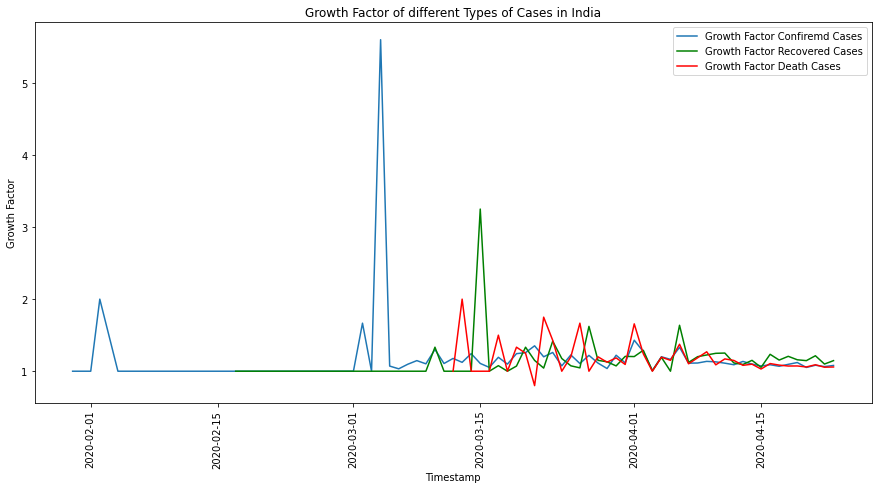

In [0]:
daily_increase_confirm=[]
daily_increase_recovered=[]
daily_increase_deaths=[]
for i in range(datewise_india.shape[0]-1):
    daily_increase_confirm.append(((datewise_india["Confirmed"].iloc[i+1]/datewise_india["Confirmed"].iloc[i])))
    daily_increase_recovered.append(((datewise_india["Recovered"].iloc[i+1]/datewise_india["Recovered"].iloc[i])))
    daily_increase_deaths.append(((datewise_india["Deaths"].iloc[i+1]/datewise_india["Deaths"].iloc[i])))
daily_increase_confirm.insert(0,1)
daily_increase_recovered.insert(0,1)
daily_increase_deaths.insert(0,1)

plt.figure(figsize=(15,7))
plt.plot(datewise_india.index,daily_increase_confirm,label="Growth Factor Confiremd Cases")
plt.plot(datewise_india.index,daily_increase_recovered,label="Growth Factor Recovered Cases",color="green")
plt.plot(datewise_india.index,daily_increase_deaths,label="Growth Factor Death Cases",color="red")
plt.xlabel("Timestamp")
plt.ylabel("Growth Factor")
plt.title("Growth Factor of different Types of Cases in India")
plt.xticks(rotation=90)
plt.legend()

Statewise data visualization

   Name of State / UT  Confirmed_cases  ...  Total cases  Active cases
18        Maharashtra             5218  ...         5218          4245
9             Gujarat             2178  ...         2178          1949
7               Delhi             2156  ...         2156          1498
25          Rajasthan             1659  ...         1659          1404
26         Tamil Nadu             1596  ...         1596           943

[5 rows x 9 columns]


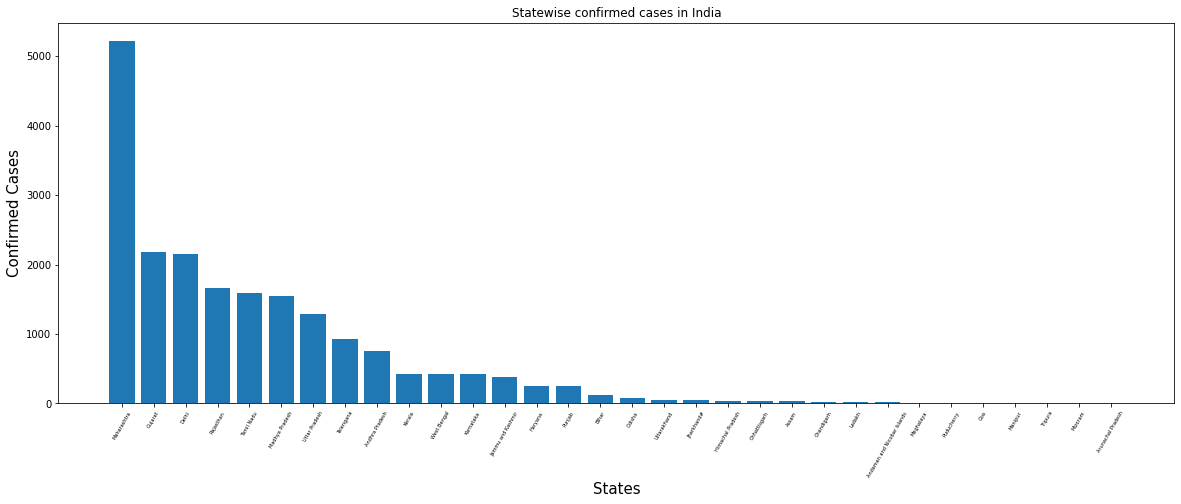

In [0]:
state_data=pd.read_csv("state_wise_data_india.csv")
temp = state_data.copy()
state_data = state_data[state_data['Confirmed_cases']>0].sort_values('Confirmed_cases',ascending=False)
index = np.arange(len(state_data))
print(state_data.head())
plt.figure(figsize=(20,7))
plt.bar(index, state_data['Confirmed_cases'])
plt.xlabel('States', fontsize=15)
plt.ylabel('Confirmed Cases', fontsize=15)
plt.xticks(index, state_data['Name of State / UT'], fontsize=5, rotation=60)
plt.title('Statewise confirmed cases in India')
plt.show()

**Recent advances in India**



The Indian government has launched a nationwide research and development (R&D) initiatve to combat coronavirus, which neither has a medicine nor a vaccine.

The Department of Science and Technology - Science and Engineering Board (DST-SERB) has announced several special research projects. The first set of 4 projects have been selected for further development into implementable technologies.

These projects were selected after peer-review and assessment by a Special Expert Committee for CoVID-19 projects.



The first project will help in search of potential metabolite biomarker 
signature for coronavirus and recognition of novel targets for therapy. Biomarkers or biological markers capture activity of a cell or an organism at a given moment and help identifying potential drugs or vaccines.

The second project will help develop viricidal coatings for inanimate surfaces used in healthcare settings such as surgical masks for the prevention of infectious diseases caused by highly contagious pathogens such as coronavirus, SARS-CoV-2.

The third project concerns development of antiviral surface coatings to prevent the spread of infections caused by influenza virus. The objective is to develop small molecular and polymeric compounds which will be coated on various surfaces and kill respiratory viruses completely upon contact.

The fourth project is to develop material which may be applied to mops to disinfect the surfaces and remove any adhering viruses or bacteria. The fifth project relates to development of antibody-based capture of 2019-nCoV and its inactivation using lipid-based in situ gel. This is the first such coordinated research initiative from India, and initiated by the government. 

### **Importance of the proposed project in the context of current status** 

This mathematical modelling will be useful to figure out how many cases India could be grappling with in the next few months.

Through the modelling process we will know the best-case and worst-case scenarios.

This would help the government calculate the potential demand for testing kits.

The study will also highlight the importance of testing and isolation as a defence against the spread of the virus.

The study may also suggest early detection of patients with the illness and a strategy to prevent transmission

This is going to help the Indian government to take all the precautionary measures well before the time.




---



---



# **Time Series Forecasting**

## **Autoregression Model**

Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step.

We can predict the value for the next time step (t+1) given the observations at the last two time steps (t-1 and t-2). As a regression model, this would look as:

X(t+1) = b0 + b1*X(t-1) + b2 *X(t-2)

Because the regression model uses data from the same input variable at previous time steps, it is referred to as an **autoregression** (regression of self).

**Autocorrelation**

An autoregression model makes an assumption that the observations at previous time steps are useful to predict the value at the next time step.

This relationship between variables is called correlation.

We can use statistical measures to calculate the correlation between the output variable and values at previous time steps at various different lags. The stronger the correlation between the output variable and a specific lagged variable, the more weight that autoregression model can put on that variable when modeling.

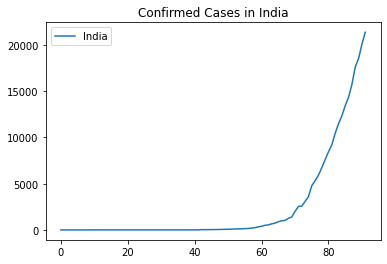

In [0]:
india_data=pd.read_csv("confirmed_india_copy.csv", header=0)
india_data.plot()
plt.title("Confirmed Cases in India")
plt.show()

**Check for Autocorrelation**

We can plot the observation at the previous time step (t-1) with the observation at the next time step (t+1) as a scatter plot.

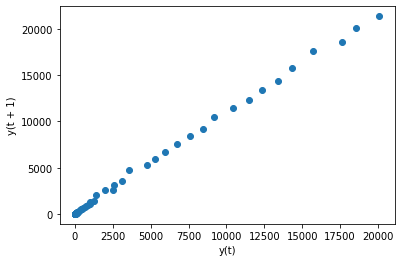

In [0]:
india_data = read_csv('confirmed_india_italy_spain.csv', header=0, index_col=0)
lag_plot(india_data)
plt.show()

Running the above plots the confirmed cases(t) on the x-axis against the cases on the previous day (t-1) on the y-axis.

We can see a large number of observations along a diagonal line of the plot. It clearly shows a relationship or some correlation.

The code below creates a lagged version of the confirmed cases dataset and calculates a correlation matrix of each column with other columns, including itself.

In [0]:
values = DataFrame(india_data.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.999441
t+1  0.999441  1.000000


It shows a strong positive correlation (0.999441) between the observation and the lag=1 value.

The plot below provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-axis.

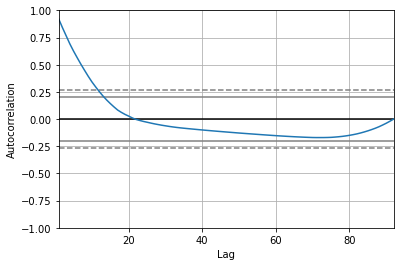

In [0]:
autocorrelation_plot(india_data)
plt.show()

### **Prediction using Autoregression Model**

Coefficients: [23.63144041  1.22759674 -0.09471232 -0.04405151]
predicted=13601.647632, expected=13430.000000
predicted=15047.904845, expected=14352.000000
predicted=16665.344079, expected=15722.000000
predicted=18457.558425, expected=17615.000000
predicted=20440.773679, expected=18539.000000
predicted=22634.366843, expected=20080.000000
predicted=25060.429996, expected=21370.000000
Test RMSE: 1922.586


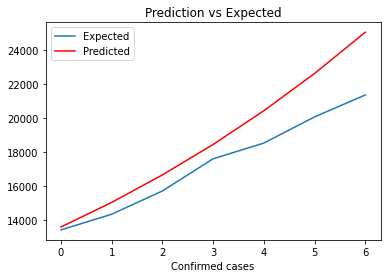

In [0]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

X = india_data.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test, label="Expected")
pyplot.plot(predictions, color='red', label="Predicted")
pyplot.title("Prediction vs Expected")
pyplot.xlabel("Confirmed cases")
pyplot.legend()

A plot of the expected (blue) vs the predicted values (red) is made.
The forecast does look good but there is a scope of improvisation.



---



### **ARIMA model**

ARIMA stands for **Autoregressive Integrated Moving Average Model**

An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

Below is the code for the prediction using ARIMA model:

In [0]:
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

series = read_csv('confirmed_india_italy_spain.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
# fit model
model = ARIMA(series, order=(8,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.India   No. Observations:                   91
Model:                 ARIMA(8, 1, 0)   Log Likelihood                -592.088
Method:                       css-mle   S.D. of innovations            147.667
Date:                Sat, 25 Apr 2020   AIC                           1204.176
Time:                        10:08:07   BIC                           1229.285
Sample:                    01-23-2020   HQIC                          1214.306
                         - 04-22-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           234.8693        nan        nan        nan         nan         nan
ar.L1.D.India     0.1919        nan        nan        nan         nan         nan
ar.L2.D.India     0.3081        nan     

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


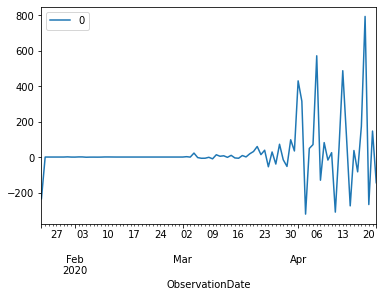

In [0]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

We get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model.

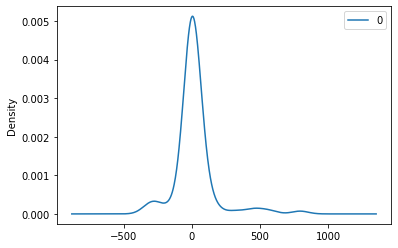

                0
count   91.000000
mean    19.962688
std    149.190933
min   -321.900060
25%     -0.505469
50%     -0.000048
75%     15.990170
max    792.923011


In [0]:
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

The distribution of the residual errors is displayed. The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).

predicted=9901.896380, expected=10453.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=11565.645683, expected=11487.000000
predicted=12556.422034, expected=12322.000000
predicted=13168.194265, expected=13430.000000
predicted=14509.528487, expected=14352.000000
predicted=15518.038478, expected=15722.000000
predicted=16641.987566, expected=17615.000000
predicted=18996.865109, expected=18539.000000
predicted=19916.778389, expected=20080.000000
predicted=21517.861476, expected=21370.000000
Test RMSE: 412.881
[10453 11487 12322 13430 14352 15722 17615 18539 20080 21370]


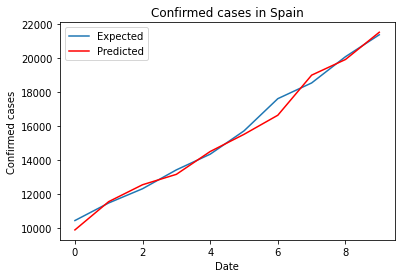

In [0]:
 from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas import read_csv

india_data = read_csv('confirmed_india_italy_spain.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
X = series.values
size = int(len(X) * 0.90)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(7,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)
# plot
print(test)
pyplot.plot(test,label="Expected")
pyplot.plot(predictions, color='red',label="Predicted")
plt.title('Confirmed cases in Spain')
pyplot.ylabel("Confirmed cases")
pyplot.xlabel("Date")
pyplot.legend()

The curve looks pretty promising.
This could be one of the best model to predict the future values of covid-19 cases in India.

---





---





# Prediction for confirmed cases in India using Italy and Spain data

In [0]:
series = read_csv('time_series_covid19_confirmed_global.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.head())

                Afghanistan  Albania  ...  Sao Tome and Principe  Yemen
Country/Region                        ...                              
2020-01-22                0        0  ...                      0      0
2020-01-23                0        0  ...                      0      0
2020-01-24                0        0  ...                      0      0
2020-01-25                0        0  ...                      0      0
2020-01-26                0        0  ...                      0      0

[5 rows x 264 columns]


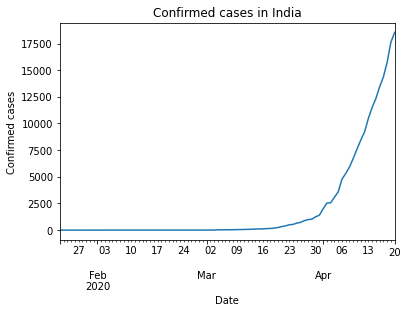

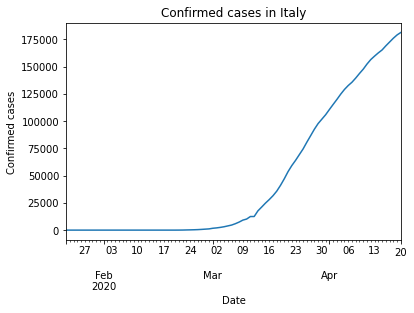

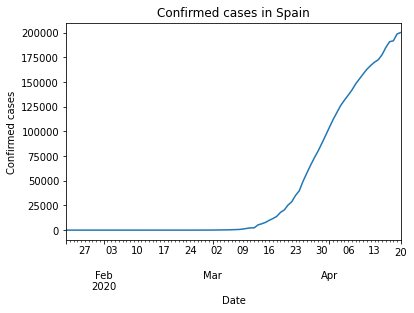

In [0]:
india = series['India']
india.plot()
plt.title('Confirmed cases in India')
pyplot.ylabel("Confirmed cases")
pyplot.xlabel("Date")
plt.show()

italy = series['Italy']
italy.plot()
plt.title('Confirmed cases in Italy')
pyplot.ylabel("Confirmed cases")
pyplot.xlabel("Date")
plt.show()

spain = series['Spain']
spain.plot()
plt.title('Confirmed cases in Spain')
pyplot.ylabel("Confirmed cases")
pyplot.xlabel("Date")
plt.show()

We can see some similarities in the graphs. 

If we truncate the dataset with respect to the data of India then we can study the relationship more accurately.

In [0]:
series_truncated = read_csv('confirmed_india_only.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.head())

                Afghanistan  Albania  ...  Sao Tome and Principe  Yemen
Country/Region                        ...                              
2020-01-22                0        0  ...                      0      0
2020-01-23                0        0  ...                      0      0
2020-01-24                0        0  ...                      0      0
2020-01-25                0        0  ...                      0      0
2020-01-26                0        0  ...                      0      0

[5 rows x 264 columns]


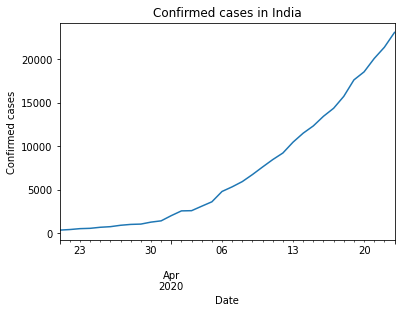

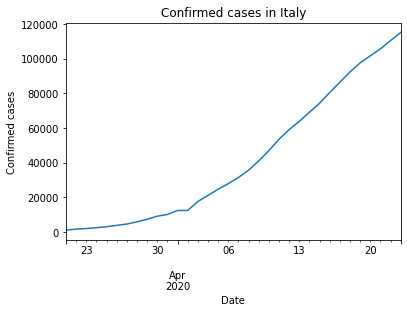

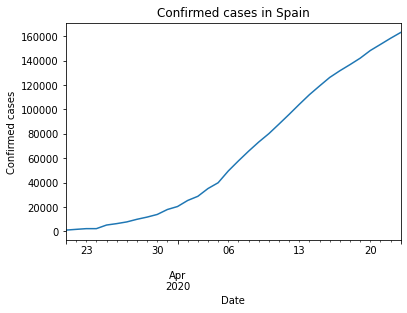

In [0]:
india = series_truncated['India']
india.plot()
plt.title('Confirmed cases in India')
pyplot.ylabel("Confirmed cases")
pyplot.xlabel("Date")
plt.show()

italy = series_truncated['Italy']
italy.plot()
plt.title('Confirmed cases in Italy')
pyplot.ylabel("Confirmed cases")
pyplot.xlabel("Date")
plt.show()

spain = series_truncated['Spain']
spain.plot()
plt.title('Confirmed cases in Spain')
pyplot.ylabel("Confirmed cases")
pyplot.xlabel("Date")
plt.show()

As we have very limited dataset, we will take first 30 datapoints for training and remaining for testing.

In [0]:
series_train = series_truncated[:30]
X_train = series_train[['Italy','Spain']]
y_train = series_train['India']
series_test = series_truncated[25:]
X_test = series_test[['Italy','Spain']]
y_test = series_test['India']

Now as we have divided the dataset in training and testing part, its time to fit the model.

Following code snippet looks very simple but acts very efficiently on the dataset.

We are using neural nets here and "relu" as activation function in final layer with single output as this is a regression problem and the output is a continuous value.

In [0]:
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='relu'))
# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam')
# fit the keras model on the dataset
model.fit(X_train, y_train, batch_size=1, epochs=100)
score = model.evaluate(X_test, y_test, batch_size=1)
print('Test RMSE: %.3f' % np.sqrt(score))

Epoch 1/100
30/30 [==============================] - 0s 3ms/step - loss: 13548693.5430
Epoch 2/100
30/30 [==============================] - 0s 1ms/step - loss: 5771401.5007
Epoch 3/100
30/30 [==============================] - 0s 1ms/step - loss: 1060587.3453
Epoch 4/100
30/30 [==============================] - 0s 1ms/step - loss: 358057.6426
Epoch 5/100
30/30 [==============================] - 0s 1ms/step - loss: 283321.2001
Epoch 6/100
30/30 [==============================] - 0s 1ms/step - loss: 293089.9818
Epoch 7/100
30/30 [==============================] - 0s 1ms/step - loss: 276737.7080
Epoch 8/100
30/30 [==============================] - 0s 1ms/step - loss: 289659.8851
Epoch 9/100
30/30 [==============================] - 0s 1ms/step - loss: 288301.9606
Epoch 10/100
30/30 [==============================] - 0s 1ms/step - loss: 288240.2099
Epoch 11/100
30/30 [==============================] - 0s 1ms/step - loss: 289617.8644
Epoch 12/100
30/30 [==============================] - 0s 1m

Now after fitting the model we will do the prediction.

In [0]:
predictions_train = model.predict(X_train)
print("Prediction on training data:\n")
for t in range(len(X_train)):
	print('predicted=%d, expected=%d' % (int(predictions_train[t]), y_train[t]))

predictions_test = model.predict(X_test)
print("\n\nPrediction on test data:\n")
for t in range(len(X_test)):
	print('predicted=%d, expected=%d' % (int(predictions_test[t]), y_test[t]))


Prediction on training data:

predicted=223, expected=330
predicted=332, expected=396
predicted=390, expected=499
predicted=500, expected=536
predicted=505, expected=657
predicted=628, expected=727
predicted=757, expected=887
predicted=962, expected=987
predicted=1217, expected=1024
predicted=1566, expected=1251
predicted=1675, expected=1397
predicted=2026, expected=1998
predicted=2119, expected=2543
predicted=2868, expected=2567
predicted=3448, expected=3082
predicted=4051, expected=3588
predicted=4618, expected=4778
predicted=5239, expected=5311
predicted=5942, expected=5916
predicted=6785, expected=6725
predicted=7703, expected=7598
predicted=8714, expected=8446
predicted=9637, expected=9205
predicted=10386, expected=10453
predicted=11284, expected=11487
predicted=12231, expected=12322
predicted=13473, expected=13430
predicted=14743, expected=14352
predicted=16065, expected=15722
predicted=17154, expected=17615


Prediction on test data:

predicted=12231, expected=12322
predicted=13

Following are the plots between predicted and expected values of confirmed cases for training data and test data.

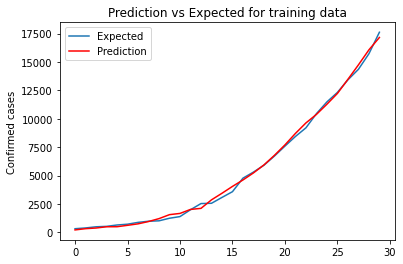

In [0]:
# print(y_train.values)
pyplot.plot(y_train.values,label="Expected")
pyplot.plot(predictions_train,label="Prediction",color="red")
pyplot.title("Prediction vs Expected for training data")
pyplot.ylabel("Confirmed cases")
pyplot.legend()


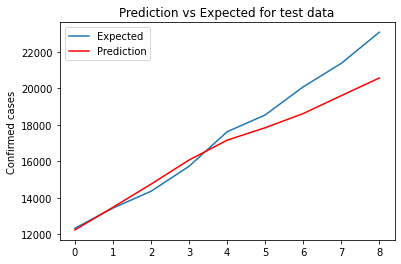

In [0]:
pyplot.plot(y_test.values,label="Expected")
pyplot.plot(predictions_test,label="Prediction",color="red")
pyplot.title("Prediction vs Expected for test data")
pyplot.ylabel("Confirmed cases")
pyplot.legend()

From the plot of "Prediction vs Expected for training data" one can say that the model is overfitting but if we consider the RMSE value(1496.572) it pretty good. 

so far for India we have very less data and as we will add the data to the training set, the model will perform well. Then we can even separate the whole training and testing data and also we can then introduce validation set.

But for now, this is working good enough.

# **Result**

The following data elaborates the result of the various mathematical models:

**Time series models**(Only India data)

1) Autoregression model -> Root Mean Squared error(RMSE) = 1922.586

2) ARIMA(Autoregressive Integrated Moving Average Model) model -> Root Mean Squared error(RMSE) = 412.881


**Prediction from Italy and Spain data**

1) Neural Net -> Root Mean Squared error(RMSE) = 1182.222

By looking at the RMSE values we can say that ARIMA model works better than AR model in case of time series data. 

The other simple neural network alse works good if we compare the RMSE values with time series data. 

As we know the current condition of Italy and Spain and as soon as the curve flatterns for these countries, we can predict the date when the curve of India will start flattening.

# **Conclusion**

From what we have seen so far, we can conclude that the there is exponential growth in covid-19 cases in each country and the mathematical predicitons are going to be very useful for governments. 

So the ARIMA model is one of the best model to predict this time series which can be concluded from the results.